

Resources
Current path: /Users/sage/Desktop/deepiction/current
GPU available:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
TensorFlow Version:  2.11.0
device mps
Pytorch GPU available:  mps

Dataset folders: pairs of images
../datasets/degradation-noisy-p50/train/sources number of images: 80 files
../datasets/degradation-noisy-p50/train/targets number of images: 80 files


TF Build architecture TF_unet (batchnorm: False dropout: 0)
Metal device set to: Apple M1 Max
Training set: (60,60) images
Validation set: (20,20) images
Epoch 1/20
4/4 [==============================] - ETA: 0s - loss: 0.2088 - mae: 0.3824
Epoch 1: saving model to ../reports/degradation-noisy-p50/TF_unet-20/model_best_1.hdf5
4/4 [==============================] - 6s 1s/step - loss: 0.2088 - mae: 0.3824 - val_loss: 0.0888 - val_mae: 0.2348
Epoch 2/20
4/4 [==============================] - ETA: 0s - loss: 0.1187 - mae: 0.2657
Epoch 2: saving model to ../reports/degradation-noisy-p50/TF_unet-20

"\nmodel = load_model(join(path, 'model_last_4'))\npreds = predict_model(model, dataset.sources)\nmetrics = compute_metrics(dataset, preds, 'rmse')\nprint(metrics)\n"

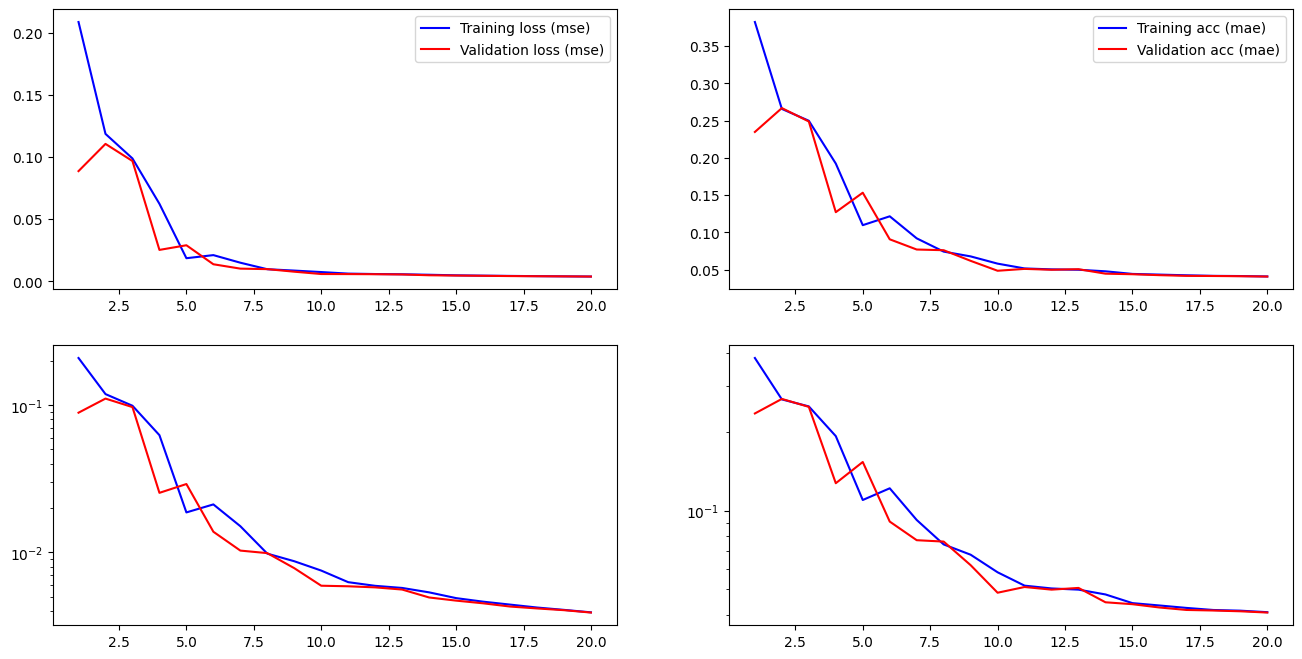

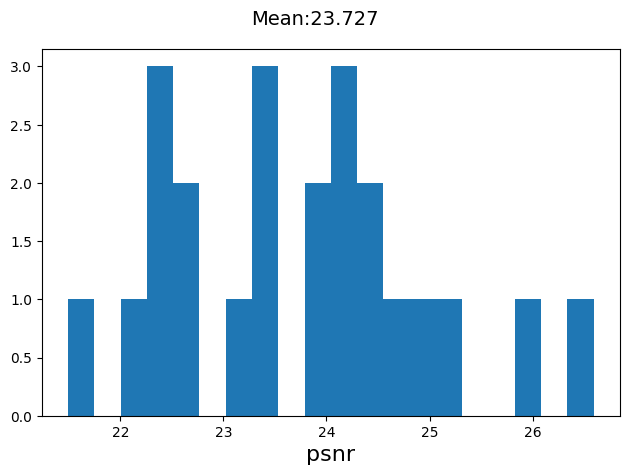

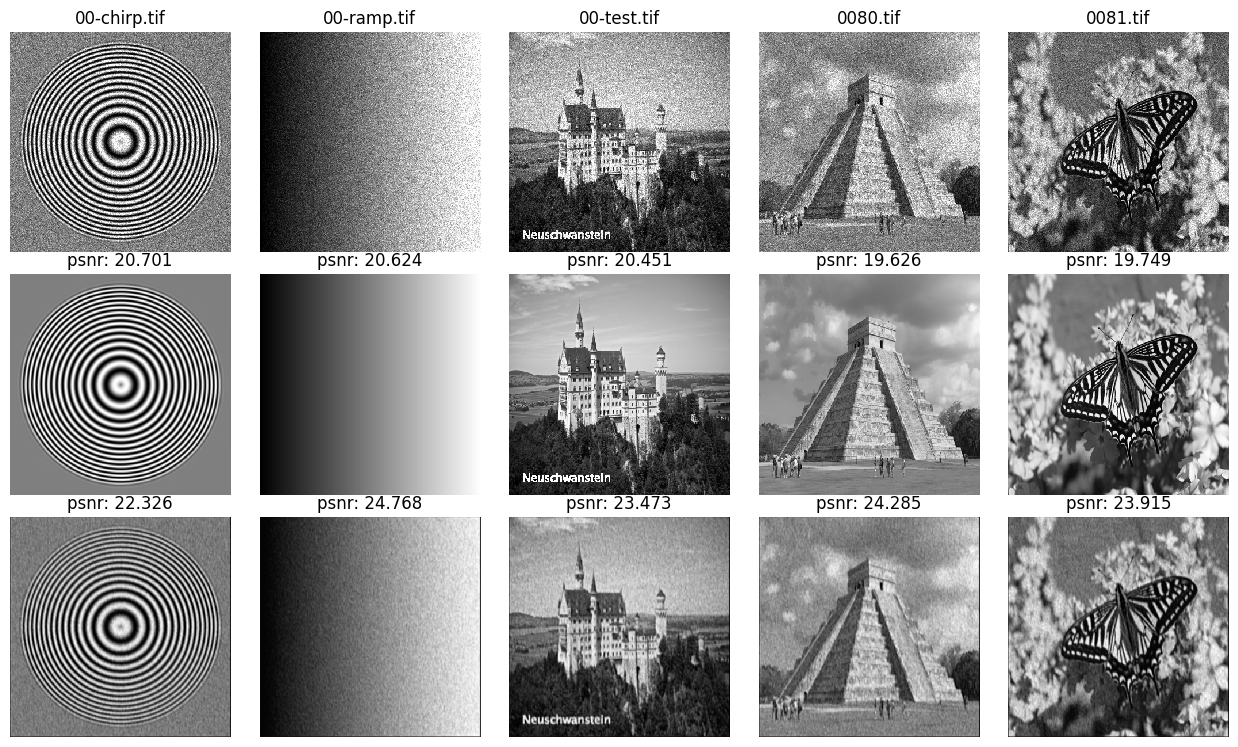

In [1]:
import numpy as np
from os.path import join
from deepiction.manager import load_model, create_model, create_report, predict_model, compute_metrics
from deepiction.imagedataset import ImageDataset
from deepiction.test import Test
from deepiction.training import Training
from deepiction.tools import Tools

Tools.resources()
name = 'TF_unet' #'PT_dncnn' 
epochs = 20

dataname = 'degradation-noisy-p50'
datapath  = join('../datasets', dataname)
path = join('../reports', dataname, f'{name}-{epochs}')

# Load training data
norm = ('minmax', 'minmax')
color = False
dataset = ImageDataset(datapath, 'train/sources', 'train/targets')
dataset.load(100, norm, color)

# Create the model
nchannels = 32
npools = 3
ninputs = 1
noutputs = 1
imagesize = dataset.get_image_size()
model = create_model(name, imagesize, ninputs, noutputs, nchannels, npools, activation='relu')

# Training
batchsize = 16
lr = 0.001
loss = 'mse'
accuracy = 'mae'
training = Training(dataset, model, path, split_validation=0.25)
report_training = training.train(epochs, 16, 0.001, loss, accuracy)

# Load test dataset
dataset = ImageDataset(datapath, 'test/sources', 'test/targets')
dataset.load(100, norm, color)

# Test
test = Test(model)
report_test = test.run(dataset, 'psnr', path)
create_report(path)

# Prediction
'''
model = load_model(join(path, 'model_last_4'))
preds = predict_model(model, dataset.sources)
metrics = compute_metrics(dataset, preds, 'rmse')
print(metrics)
'''

